In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control

### PT3 system with PD controller

The process is:

$$ P(s) = \frac{k}{(1 + T_1 s)(1 + T_2 s)(1 + T_3 s)}$$

the controller is:

$$ C(s) = K_p (1 + T_D s) $$

**Q1.** Investigate the given system in time- and frequency-domain. Plot the Bode- and Nyquist-plots. Calculate the stability margins for the given sets of controller parameters. Take notes on the stability. 

In [38]:
# define the parameters
k = 2
T1 = 1
T2 = 1
T3 = 1

Kp = 1  # 1, 1, 2, 4
TD = 1  # 1, 10, 0.1, 0.1
Kd = Kp*TD

# controller
numC = [Kd, Kp]
denC = 1
C = control.tf(numC, denC)

# process
numP = [k]
denP = [T1*T2*T3, (T1*T2+T1*T3+T2*T3), (T1+T2+T3), 1]
P = control.tf(numP, denP)

In [26]:
G0 = control.series(C, P)
G = control.feedback(G0)

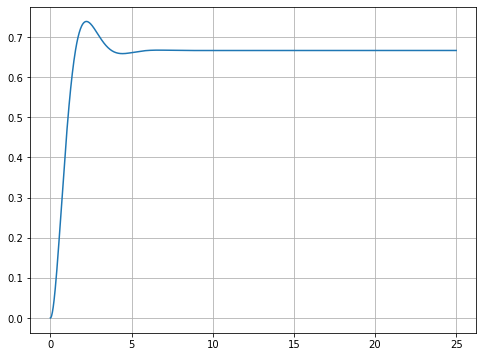

In [31]:
# step response
t = np.linspace(0, 25, 1000)
t, y = control.step_response(G, t)
plt.figure(figsize=(8,6))
plt.plot(t, y), plt.grid(True);

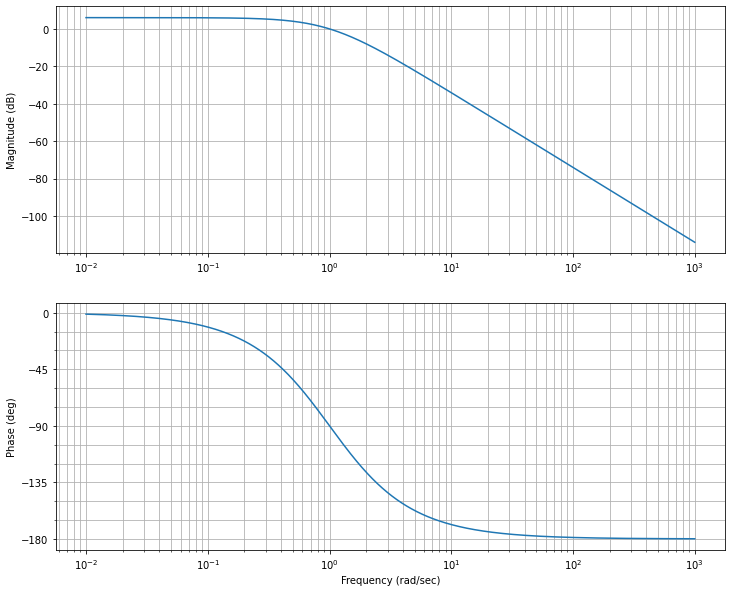

In [35]:
# Bode plot
omega = np.logspace(-2, 3, 1000)
plt.figure(figsize=(12, 10))
control.bode_plot(G0, omega, dB=True);

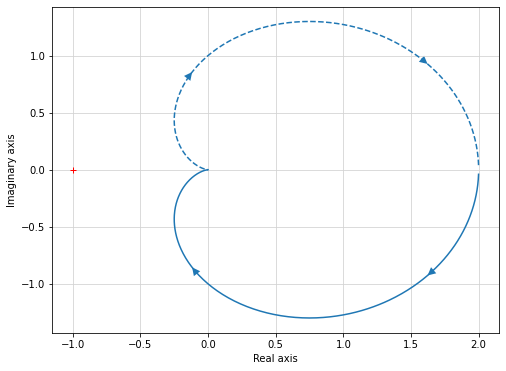

In [32]:
# Nyquist plot
omega = np.logspace(-2, 3, 1000)
plt.figure(figsize=(8, 6))
control.nyquist_plot(G0, omega);
#plt.ylim(-0.5, 0.5)

In [57]:
# margins
def check_stability(Kp2, TD2):
    Kp = Kp2
    TD = TD2
    Kd = Kp*TD
    
    numC = [Kd, Kp]
    denC = 1
    C = control.tf(numC, denC)
    G0 = control.series(C, P)
    gm, pm, sm, gc, pc, sc = control.stability_margins(G0)
    gm_dB = 20*np.log10(gm)
    print(f'{"Stable" if gm_dB>0 and pm>0 else "Unstable"}: Gm[dB] = {gm}, Pm = {pm}')

Kp = 1  # 1, 1, 2, 4
TD = 1  # 1, 10, 0.1, 0.1    
check_stability(1, 1)
check_stability(1, 10)
check_stability(2, 0.1)
check_stability(4, 0.1)

Stable: Gm[dB] = inf, Pm = 90.00000000000006
Stable: Gm[dB] = inf, Pm = 37.94810890553876
Stable: Gm[dB] = 2.8571428571428577, Pm = 33.84624399698893
Stable: Gm[dB] = 1.4285714285714288, Pm = 9.396947396705514


In [58]:
# Notes on stability
# It is clear from the visual investigation of the system that it is stable

# Gain and phase margins also prove that the system is stable


**Q2.** Plot the step response of the system for the given sets of controller parameters. Take notes on your findings about the effect of controller parameters on the step response (transient behavior, steady-state error).

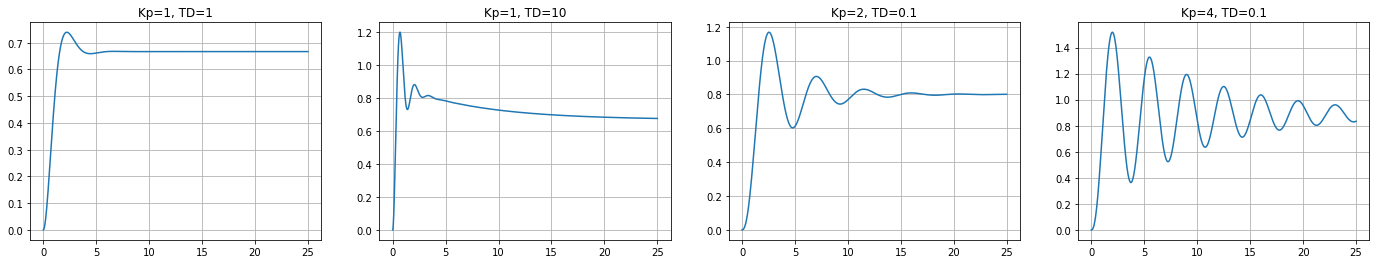

In [142]:
def plot_step_response(Kp2, TD2):
    Kp = Kp2
    TD = TD2
    Kd = Kp*TD
    
    numC = [Kd, Kp]
    denC = 1
    C = control.tf(numC, denC)
    G0 = control.series(C, P)
    G = control.feedback(G0)
    
    t = np.linspace(0, 25, 1000)
    t, y = control.step_response(G, t);
    return t, y, Kp, TD
    
def multi_plot(entries):
    f, grs = plt.subplots(1, len(entries), figsize=(24, 4))
    for i, entry in enumerate(entries):
        t, y, Kp, TD = plot_step_response(entry[0], entry[1])
        grs[i].grid(True)
        grs[i].set_title(f'Kp={Kp}, TD={TD}')
        grs[i].plot(t, y)

entries = [[1, 1], [1, 10], [2, 0.1], [4, 0.1]]
multi_plot(entries)

In [ ]:
# Increasing Kp essentially increases the settling time, basically renders our system slow.
# Decreasing Kp descreases the rise time, which results in higher overshoots.

# Increasing TD leads to higher overshoots in the transient part since part contains 
# abrupt changes in slope.

# Since we don't have an integrating effect in the system, there is a non-zero steady-state error.

**Q3.** Compare this control system to the PT3 + PI controller. What are the main differences?

In [159]:
# define the parameters
k = 2
T1 = 1
T2 = 1
T3 = 1

Kp = 1  # 1, 1, 2, 4
TI = 1  # 1, 10, 0.1, 0.1
Ki = Kp/TI

# controller
numC = [Ki, Kp]
denC = [TI, 0]
C = control.tf(numC, denC)

# process
numP = [k]
denP = [T1*T2*T3, (T1*T2+T1*T3+T2*T3), (T1+T2+T3), 1]
P = control.tf(numP, denP)


In [150]:
G0 = control.series(C, P)
G = control.feedback(G0)


s + 1
-----
  s


s + 1
-----
10 s


s + 2
-----
0.1 s


s + 4
-----
0.1 s



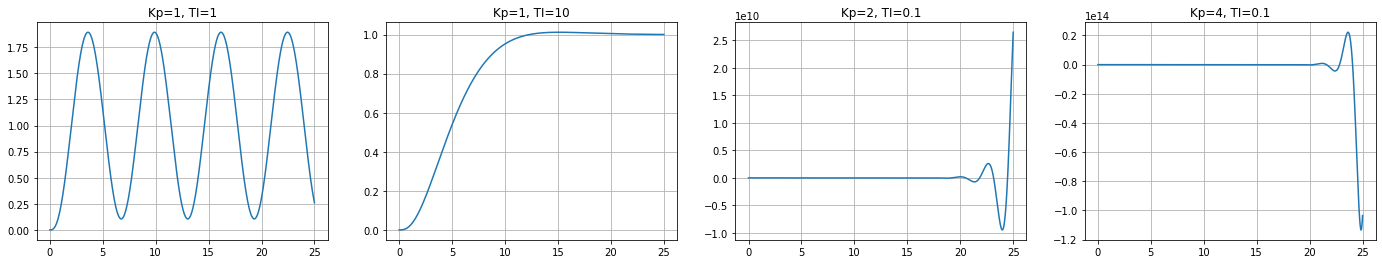

In [158]:
def plot_step_response(Kp2, TI2):
    Kp = Kp2
    TI = TI2
    Kd = Kp/TI
    
    numC = [Ki, Kp]
    denC = [TI, 0]
    C = control.tf(numC, denC)
    G0 = control.series(C, P)
    G = control.feedback(G0)
    
    t = np.linspace(0, 25, 1000)
    t, y = control.step_response(G, t);
    return t, y, Kp, TI
    
def multi_plot(entries):
    f, grs = plt.subplots(1, len(entries), figsize=(24, 4))
    for i, entry in enumerate(entries):
        t, y, Kp, TI = plot_step_response(entry[0], entry[1])
        grs[i].grid(True)
        grs[i].set_title(f'Kp={Kp}, TI={TI}')
        grs[i].plot(t, y)

entries = [[1, 1], [1, 10], [2, 0.1], [4, 0.1]]
multi_plot(entries)

In [155]:
def check_stability(Kp2, TD2):
    Kp = Kp2
    TD = TD2
    Kd = Kp/TD
    
    numC = [Kd, Kp]
    denC = [TD, 0]
    C = control.tf(numC, denC)
    G0 = control.series(C, P)
    gm, pm, sm, gc, pc, sc = control.stability_margins(G0)
    gm_dB = 20*np.log10(gm)
    print(f'{"Stable" if gm_dB>0 and pm>0 else "Unstable"}: Gm[dB] = {gm}, Pm = {pm}')

Kp = 1  # 1, 1, 2, 4
TD = 1  # 1, 10, 0.1, 0.1    
check_stability(1, 1)
check_stability(1, 10)
check_stability(2, 0.1)
check_stability(4, 0.1)

Unstable: Gm[dB] = 0.9999999999999996, Pm = -5.684341886080802e-14
Stable: Gm[dB] = 4.813693579307121, Pm = 58.86201358331209
Unstable: Gm[dB] = 0.018024068467896535, Pm = -67.38462709130935
Unstable: Gm[dB] = 0.009012034233948267, Pm = -72.06913993238808


In [ ]:
# Having an integrator effect yields a type 1 system, at least. That's why we have a zero 
# steady state error in our system.